# Pop atoms
Let's find the musical atoms that make up the most popular hits of the last decades

## Import functions and libraries

In [1]:
'''
COMENTARIO:

No podemos comentar mucho este archivo porque no podemos ejecutarlo, pero el código ya está muy bien comentado
'''
from functions import *
from os.path import exists
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

ModuleNotFoundError: No module named 'billboard'

## Get data

We want to compare the audio features of the most popular songs of before 1962 (before the Beatles era), with a more general sample of popular songs from the 60's to current time. 

### Popular before The Beatles

In [4]:
# Get all the Billboard data.
# Billboard collects the most popular songs weekly since 1958. This is the data we will use for this project.
# The API may fail, so to avoid having to repeat queries, we save the data continuously int a csv ("df_ranks_weekly.csv")

recalculate = True

if recalculate:
        
    df_ranks_weekly = create_weekly_ranks_df("1958-01-01", "1963-12-31", csv_file = "df_weekly_ranksb.csv")

NameError: name 'create_weekly_ranks_df' is not defined

In [ ]:
# Get peak values. 
# Some songs are listed more than once, as they come up several times in the charts for different weeks. 
# We will only keep one entry for each song, calculate the peak position, maximum number of weeks on the chart, and date that peak position was reached for each song.  

if not exists("df_songs_60.csv"):    

#   Load the billboard ranks data
    df_ranks_weekly = pd.read_csv("df_ranks_weekly.csv")

    df_songs_60 = calculate_ranks_peaks(df_ranks_weekly)

    # Save the cleaned data to a CSV file.
    df_songs_60.to_csv("df_songs_60.csv", index=False)

In [ ]:
## Get audio analysis data from Spotify.
# ! Beware: DO NOT re-execute this query unless you absolutely have to. Spotify may block your API key for a while.  

if not exists("df_audio_analysis_60.csv"):

    # Load the cleaned data
    df_songs_60 = pd.read_csv("df_songs_60.csv")

    # add audio analysis columns
    audio_analysis_df = create_audio_analysis_df(df_songs_60)

    # Save the cleaned data to a CSV file.
    audio_analysis_df.to_csv("df_audio_analysis.csv", index=False)

### Popular of all time

In [2]:
# We asked GPT for a list of songs that represent the greatest hits from year to year since 1960. 
# The result was stored in a csv file "df_songs_sample.csv"

df_songs_sample = pd.read_csv("df_songs_sample.csv")

# we need to melt the dataframe to have one column for years, one column for titles, and one column for the artist name. 
df_songs_sample = df_songs_sample.melt(var_name='peak_year', value_name='title')
df_songs_sample["artist"] = df_songs_sample["title"].str.split(" - ").str[0]
df_songs_sample["title"] = df_songs_sample["title"].str.split(" - ").str[1]

In [3]:
# We can now query these songs from spotify. 
# ! Beware: DO NOT re-execute this query unless you absolutely have to. Spotify may block your API key for a while.  

if not exists("df_audio_analysis_sample.csv"):
    df_audio_analysis_sample = create_audio_analysis_df(df_songs_sample)

    # Save the cleaned data to a CSV file.
    df_audio_analysis_sample.to_csv("df_audio_analysis_sample.csv", index=False)

## Clean data

### Popular before The Beatles

In [4]:
# read data from csvs
aax_60 = pd.read_csv("df_audio_analysis_60.csv")
aax_sample = pd.read_csv("df_audio_analysis_sample.csv")

In [5]:
# Let's explore the 58-60s data
aax_60.duplicated(subset=['title', 'artist']).sum()
aax_60.info()

# in the data from the years before 1960, there are no null values. 
# All the data types seem correct.  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 819 entries, 0 to 818
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   title             819 non-null    object 
 1   artist            819 non-null    object 
 2   weeks             819 non-null    float64
 3   peak_rank         819 non-null    float64
 4   peak_date         819 non-null    object 
 5   id                819 non-null    object 
 6   title_spotify     819 non-null    object 
 7   album             819 non-null    object 
 8   sp_popularity     819 non-null    float64
 9   colab             819 non-null    object 
 10  release_date      819 non-null    object 
 11  danceability      819 non-null    float64
 12  energy            819 non-null    float64
 13  loudness          819 non-null    float64
 14  speechiness       819 non-null    float64
 15  acousticness      819 non-null    float64
 16  instrumentalness  819 non-null    float64
 1

### Popular of all time. 

In [6]:
# Let's explore the sample data

aax_sample.duplicated(subset=['title', 'artist']).sum()
aax_sample.loc[aax_sample.duplicated(subset=['title', 'artist'], keep=False), ['title_spotify', 'title', 'peak_year', 'artist']].sort_values(by=['title', 'artist'])
# there are 6 repeated values in the sample data. Most of them look ok (some songs can reach a popularity peak in multiple years).
# But there's one particular data point that looks  mistaken: the song "I Will Always Love You" by Whitney Houston wasn't released in 1975. 


title_spotify                      title  peak_year  \
77            I Will Always Love You     I Will Always Love You       1975   
166           I Will Always Love You     I Will Always Love You       1993   
306                  Save Your Tears            Save Your Tears       2021   
322                  Save Your Tears            Save Your Tears       2024   
158                            Shoop                      Shoop       1991   
174                            Shoop                      Shoop       1994   
2                          The Twist                  The Twist       1960   
10                         The Twist                  The Twist       1962   
3    The Theme from "A Summer Place"  Theme from A Summer Place       1960   
6    The Theme from "A Summer Place"  Theme from A Summer Place       1961   
179  You Oughta Know - 2015 Remaster            You Oughta Know       1995   
184  You Oughta Know - 2015 Remaster            You Oughta Know       1996   

                          artist  
77               Whitney Houston  
166              Whitney Houston  
306                   The Weeknd  
322                   The Weeknd  
158                  Salt-N-Pepa  
174                  Salt-N-Pepa  
2                 Chubby Checker  
10                Chubby Checker  
3    Percy Faith & His Orchestra  
6    Percy Faith & His Orchestra  
179            Alanis Morissette  
184            Alanis Morissette

In [7]:

# We will remove the mistaken value and filter the first peak date for the rest of duplicates.
aax_sample = aax_sample[~((aax_sample.title=="I Will Always Love You") & (aax_sample.peak_year==1975))]
aax_sample.drop_duplicates(subset=['title', 'artist'], keep='first', inplace=True)

aax_sample.duplicated(subset=['title', 'artist']).sum() #there are no more duplicates

0

## Combine datasets: 

In [8]:
# We want to make sure that the datasets are comparable and use the same column names. 

print(aax_sample.columns)
print(aax_60.columns)

Index(['title_spotify', 'album', 'sp_popularity', 'artist', 'colab',
       'release_date', 'danceability', 'energy', 'key', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'duration', 'peak_year', 'title'],
      dtype='object')
Index(['title', 'artist', 'weeks', 'peak_rank', 'peak_date', 'id',
       'title_spotify', 'album', 'sp_popularity', 'colab', 'release_date',
       'danceability', 'energy', 'loudness', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'key', 'mode', 'tempo',
       'duration'],
      dtype='object')


In [9]:
# We will:
# * calculate "peak_year" from peak_date in the 60s dataset: 
aax_60['peak_year'] = pd.to_datetime(aax_60['peak_date']).dt.year

# * add "lustrum_year" to group songs by lustrum later in the analysis:
aax_60['lustrum'] = (aax_60['peak_year'] // 5 * 5).astype(str) + '-' + ((aax_60['peak_year'] // 5 * 5) + 4).astype(str)
aax_sample['lustrum'] = (aax_sample['peak_year'] // 5 * 5).astype(str) + '-' + ((aax_sample['peak_year'] // 5 * 5) + 4).astype(str)


# * sort the columns to make df easier to compare and humanly readable: 
aax_sample = aax_sample.reindex(['title', 'title_spotify','artist', 'album', 'colab', 
                           'release_date', 'peak_year', 'lustrum', 'sp_popularity', 
                           'tempo', 'duration','key',  'mode', 
                           'danceability', 'energy', 'loudness','speechiness', 'acousticness', 'instrumentalness', 'liveness','valence'], axis = 1)

aax_60 = aax_60.reindex(['title', 'title_spotify', 'artist', 'album', 'colab', 'id', 
                       'release_date', 'peak_rank', 'peak_date', 'peak_year', 'lustrum', 'weeks', 'sp_popularity', 
                       'tempo', 'duration', 'key', 'mode', 
                       'danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence'], axis = 1)


In [10]:
## We can now combine de df: 
aax_combined = pd.concat([aax_60, aax_sample], ignore_index=True)

In [11]:
# We add a column to check if the song was popular before 1964:
aax_combined["before_1964"] = aax_combined["peak_year"] < 1964

In [12]:

# We clean and format the release date column and calculate the release year:

aax_combined['release_date'] = aax_combined['release_date'].apply(parse_dates)
aax_combined['release_date'] = aax_combined['release_date'].apply(lambda x: parse_years(x) if pd.isna(pd.to_datetime(x, errors='coerce')) else pd.to_datetime(x, errors='coerce'))

aax_combined = aax_combined.dropna(subset=['release_date'])
aax_combined['release_year'] = aax_combined['release_date'].dt.year

aax_combined.to_csv("df_aax_combined.csv", index=False)

In [13]:
# We canculate de release year for later analysis: 
aax_combined['release_date'] = pd.to_datetime(aax_combined['release_date'], errors='coerce')

## Explore data

Let's start by analysis the relation between different parameters:


In [2]:
# load the combined df
aax_combined = pd.read_csv("df_aax_combined.csv")

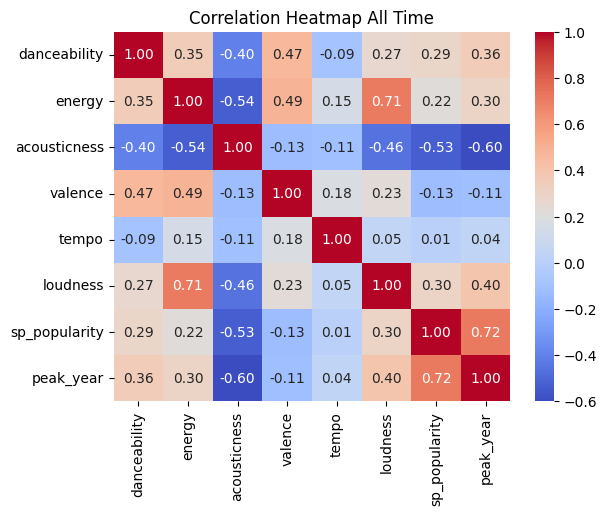

In [7]:
'''
COMENTARIO:
No sabemos si sería posible, pero se podría meter este código en función??
'''

# Calcular la matriz de correlación
corr = aax_combined[['danceability', 'energy', 'acousticness', 'valence', 'tempo', 'loudness','sp_popularity', 'peak_year']].corr()
# Crear el heatmap
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap All Time')
plt.show()

There seems to be a relation between time and other parameters. Let's drill in. 

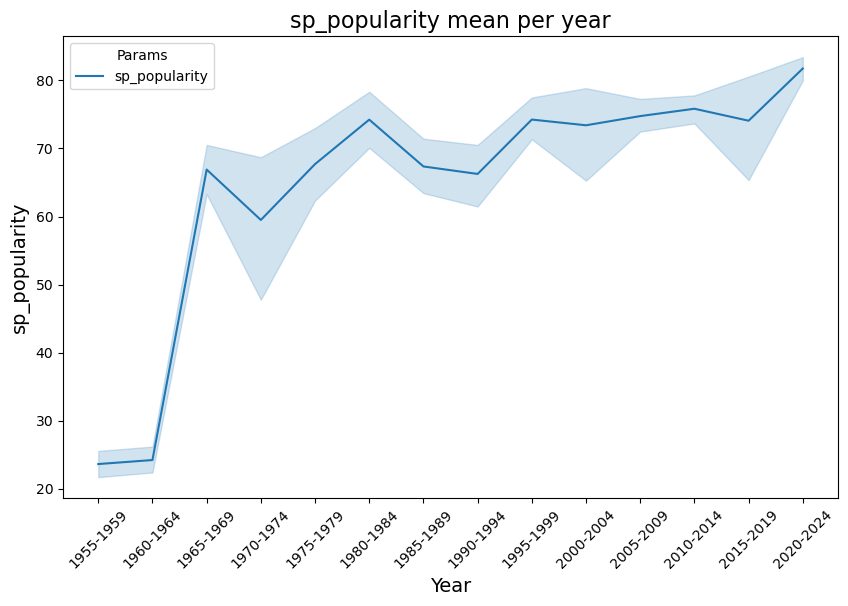

In [15]:
# Plot line charts of popularity: 

plot_year_mean(aax_combined, type="line", params=['sp_popularity'], year_column='lustrum',grid=False)


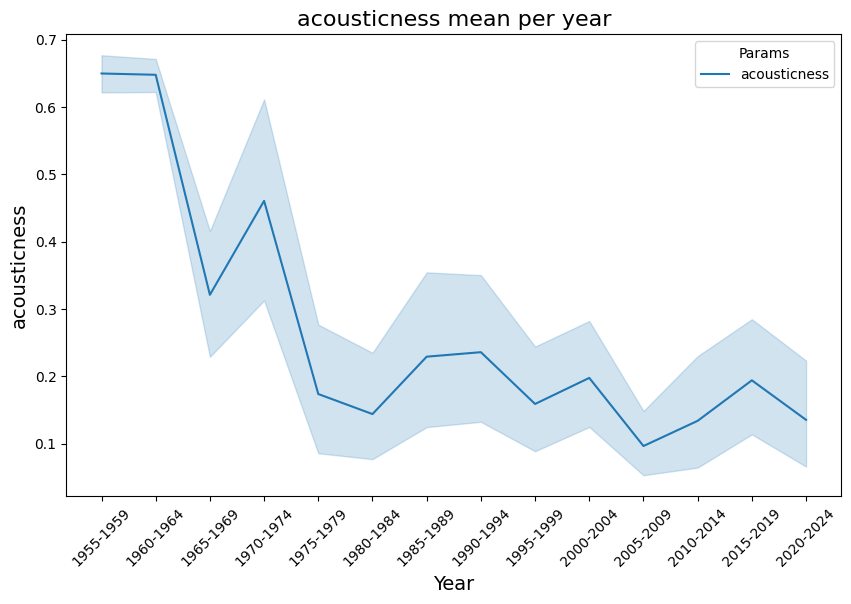

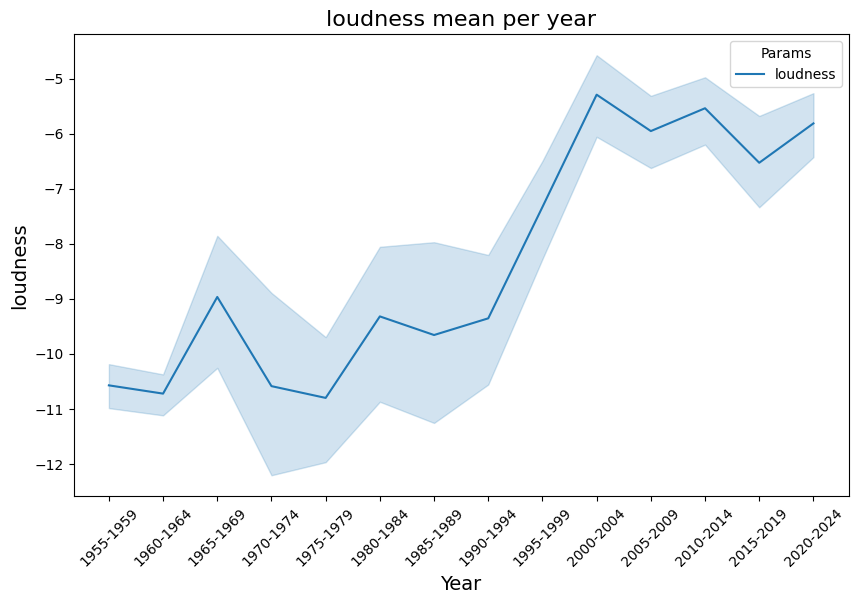

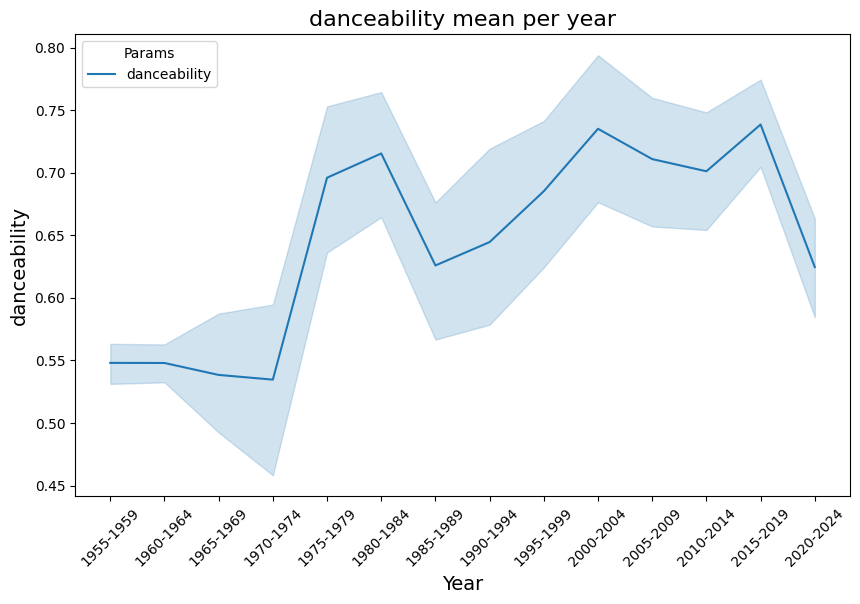

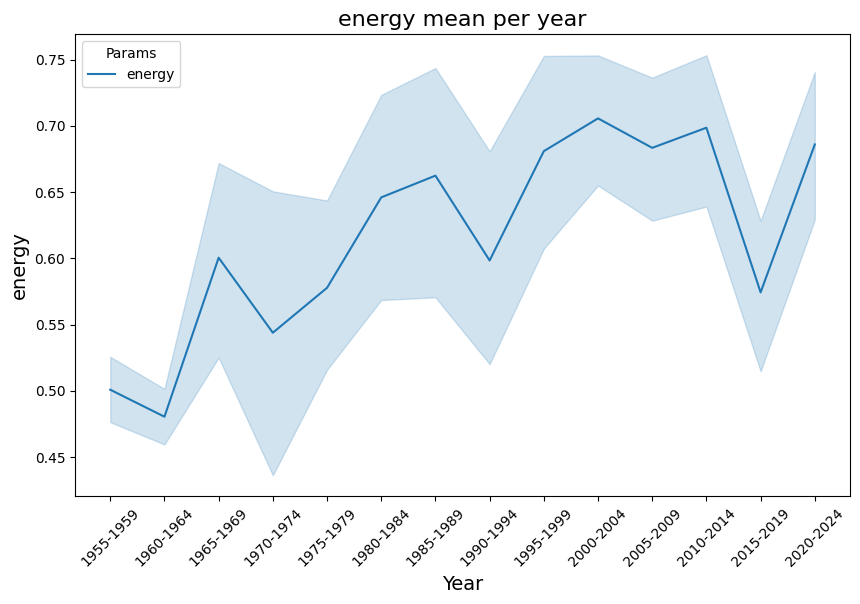

In [3]:

# Plot line charts of different acoustic parameters:
plot_year_mean(aax_combined, type="line", params=['acousticness'], year_column='lustrum',grid=False)
plot_year_mean(aax_combined, type="line", params=['loudness'], year_column='lustrum',grid=False)
plot_year_mean(aax_combined, type="line", params=['danceability'], year_column='lustrum',grid=False)
plot_year_mean(aax_combined, type="line", params=['energy'], year_column='lustrum',grid=False)

Did it take longer to reach fame in the past?

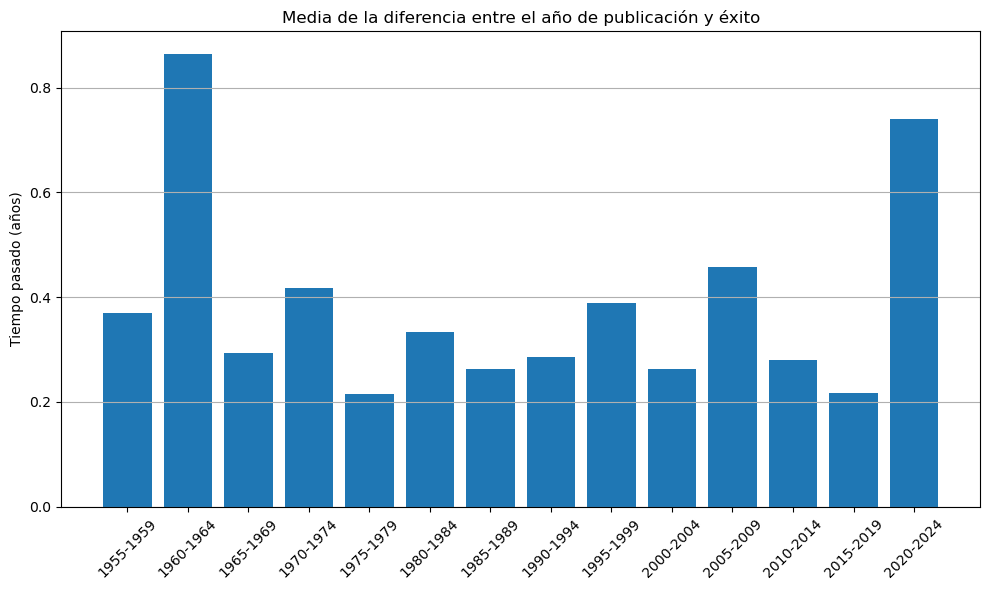

In [26]:
'''
COMENTARIO:

No sabemos si sería posible, pero se puede meter este código también en función?
'''
# Calculate the mean difference between peak date and release date:

aax_combined['difference'] = np.where(aax_combined['peak_year'] >= aax_combined['release_year'],
                                     aax_combined['peak_year'] - aax_combined['release_year'],
                                     np.nan)

# group by lumstrum and calculate the mean:
mean_difference = aax_combined.groupby('lustrum')['difference'].mean().reset_index()

plt.figure(figsize=(10, 6))
plt.bar(mean_difference['lustrum'], mean_difference['difference'])
plt.xlabel('')
plt.ylabel('Tiempo pasado (años)')
plt.title('Media de la diferencia entre el año de publicación y éxito')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

## Conclussions: 

### The Beatles invented popularity

We can observe some general trends that differentiate the music before and after the Beatles era. But if we had to pick only one headline, this would be it: 

"The Beatles invented popularity"

Or popularity invented the Beatles, more probably. This is the time when color TV sets gained adoption the mass media was really born. 

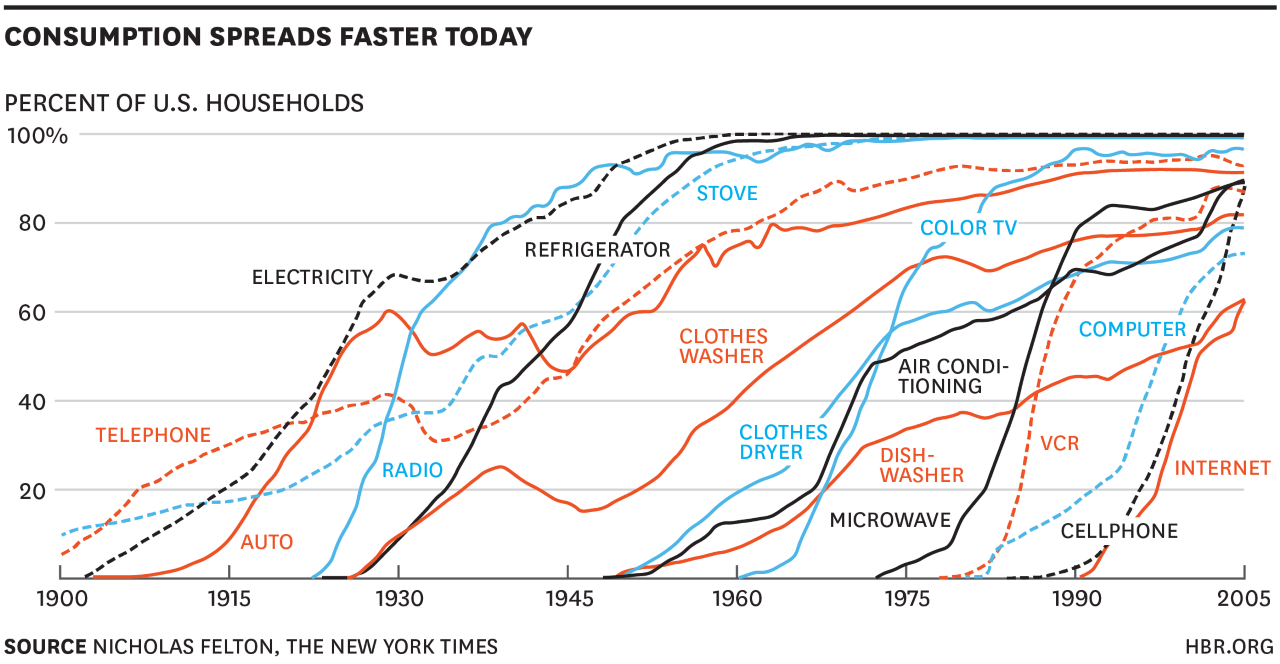

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


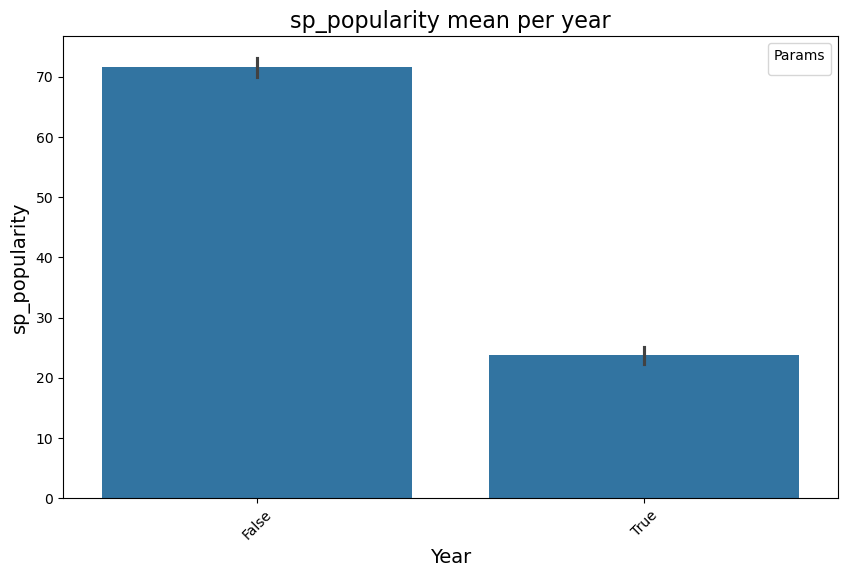

In [17]:
# Plot bar chart of popularity before 1964 (true of false):
plot_year_mean(aax_combined, type="bar", params=['sp_popularity'], year_column='before_1964',figsize=(10,6),grid=False)

There's a huge difference in popularity before the songs before and after that time. This could also be explained due to some data bias, and we will leave this for future analysis. 

### Music is becoming more synthetic 

The other major change has to do with acousticness. Songs become more synthetic after this era and this is clear in the charts. 

/Users/almu/Code/ironhack_projects/w3-popatoms/functions.py:261: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title="Params")


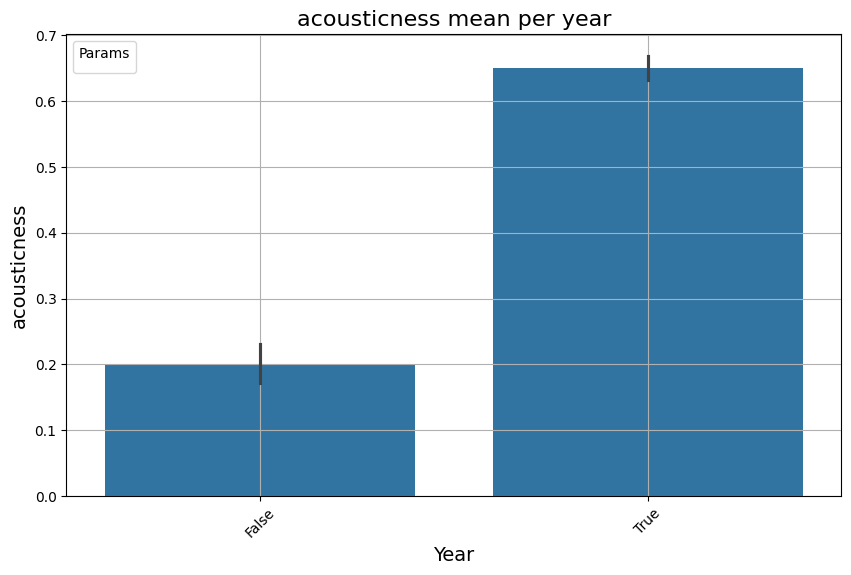

In [7]:
# Plot line charts of different acoustic parameters:
plot_year_mean(aax_combined, type="bar", params=['acousticness'], year_column='before_1964')


### Music is becoming louder